# 自订(Custom) Callback

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


# 汇入 MNIST 手写阿拉伯数字 训练资料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# 训练/测试资料的 X/y 维度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
# 颜色范围：0~255，所以，公式简化为 x / 255
# 注意，颜色0为白色，与RGB颜色不同，(0,0,0) 为黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [2]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [3]:
# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [4]:
y_train_one_hot_encoding = tf.keras.utils.to_categorical(y_train)

In [5]:
import pandas as pd

df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])

In [6]:
class CustomCallback_2(tf.keras.callbacks.Callback):
    def __init__(self):
        self.task_type=''
        self.epoch=0
        self.batch=0
        self.df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])
        
    def on_train_begin(self, logs=None):
        self.task_type='训练'
        print("训练开始...")

    def on_train_end(self, logs=None):
        print(self.df.shape)
        global df
        df = self.df
        print("训练结束.")

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch=epoch
#         print(f"{self.task_type}第 {epoch} 执行周期开始...")

#     def on_epoch_end(self, epoch, logs=None):
#         print(f"{self.task_type}第 {epoch} 执行周期结束.")

#     def on_test_begin(self, logs=None):
#         self.task_type='测试'
#         print("测试开始...")

#     def on_test_end(self, logs=None):
#         print("测试结束.")

#     def on_predict_begin(self, logs=None):
#         self.task_type='预测'
#         print("预测开始...")

#     def on_predict_end(self, logs=None):
#         print("预测结束.")

#     def on_train_batch_begin(self, batch, logs=None):
#         print(f"训练 第 {self.epoch} 执行周期, 第 {batch} 批次开始...")

    def on_train_batch_end(self, batch, logs=None):
        # 新增资料至 df2 DataFrame
#         print(f"训练 第 {self.epoch} 执行周期, 第 {batch} 批次结束.")
#         df2 = pd.DataFrame([[self.epoch, self.batch, logs["loss"]]], columns=['epoch', 'batch', 'weight'])
#         df2 = pd.DataFrame([[self.epoch, self.batch, self.model.get_weights()]], columns=['epoch', 'batch', 'weight'])
        df2 = pd.DataFrame([[self.epoch, batch, logs["loss"]]], columns=['epoch', 'batch', 'metrics'])
        self.df = self.df.append(df2, ignore_index=True)

#     def on_test_batch_begin(self, batch, logs=None):
#         print(f"测试 第 {self.epoch} 执行周期, 第 {batch} 批次开始...")

#     def on_test_batch_end(self, batch, logs=None):
#         print(f"测试 第 {self.epoch} 执行周期, 第 {batch} 批次结束.")

#     def on_predict_batch_begin(self, batch, logs=None):
#         print(f"预测 第 {self.epoch} 执行周期, 第 {batch} 批次开始...")

#     def on_predict_batch_end(self, batch, logs=None):
#         print(f"预测 第 {self.epoch} 执行周期, 第 {batch} 批次结束.")


In [7]:
model.fit(x_train_norm, y_train_one_hot_encoding, epochs=15, batch_size=256, verbose=0, validation_split=0.2, callbacks=[CustomCallback_2()])

训练开始...
(2820, 3)
训练结束.


In [8]:
df.to_excel('./custom_callback.xlsx')

In [9]:
df.head()

,epoch,batch,metrics
0,0,0,0.092268
1,0,1,0.090931
2,0,2,0.089500
3,0,3,0.088192
4,0,4,0.086809


In [10]:
# 取得最后一层的权重

# import numpy as np
# # weights
# np.array(df.loc[0,'metrics'])[-1].shape



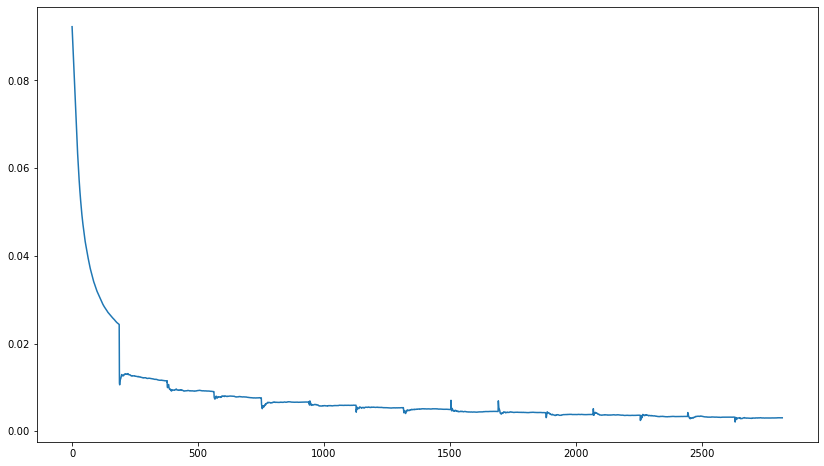

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(df.metrics)

In [12]:
df.tail()

,epoch,batch,metrics
2815,14,183,0.003050
2816,14,184,0.003047
2817,14,185,0.003048
2818,14,186,0.003056
2819,14,187,0.003053


In [13]:
df2 = df.groupby(by='epoch').min()
df2

,batch,metrics
epoch,,
0,0,0.024344
1,0,0.010578
2,0,0.009009
3,0,0.007309
4,0,0.005138
5,0,0.005715
6,0,0.004339
7,0,0.004034
8,0,0.004324


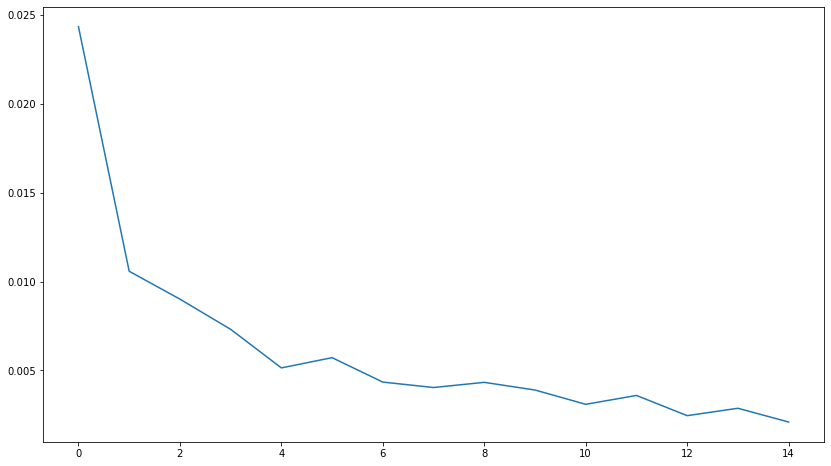

In [14]:
plt.figure(figsize=(14,8))
plt.plot(df2.index, df2.metrics)